In [45]:
import pandas as pd
df = pd.read_csv('events.csv')
print(df.head())

       timestamp  visitorid event  itemid  transactionid
0  1433221332117     257597  view  355908            NaN
1  1433224214164     992329  view  248676            NaN
2  1433221999827     111016  view  318965            NaN
3  1433221955914     483717  view  253185            NaN
4  1433221337106     951259  view  367447            NaN


In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
df['date'] = df['timestamp'].apply(lambda x: datetime.fromtimestamp(x/1000))
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['dayofweek'] = df['date'].dt.dayofweek
df['hour'] = df['date'].dt.hour
df.head()

,timestamp,visitorid,event,itemid,transactionid,date,year,month,day,dayofweek,hour
0,1433221332117,257597,view,355908,NaN,2015-06-02 07:02:12.117,2015,6,2,1,7
1,1433224214164,992329,view,248676,NaN,2015-06-02 07:50:14.164,2015,6,2,1,7
2,1433221999827,111016,view,318965,NaN,2015-06-02 07:13:19.827,2015,6,2,1,7
3,1433221955914,483717,view,253185,NaN,2015-06-02 07:12:35.914,2015,6,2,1,7
4,1433221337106,951259,view,367447,NaN,2015-06-02 07:02:17.106,2015,6,2,1,7


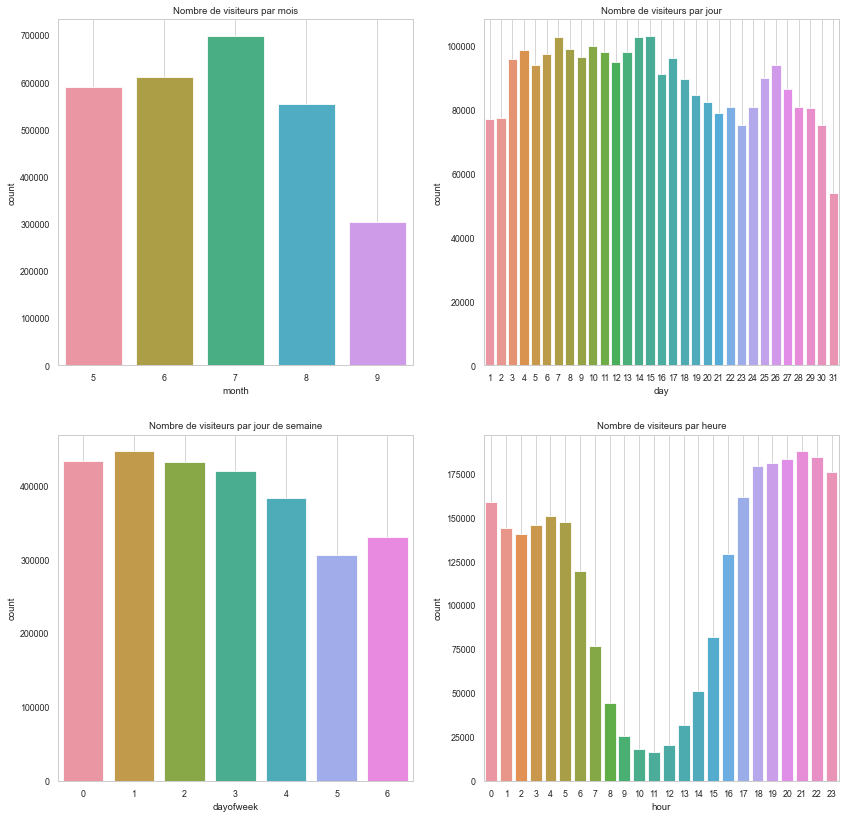

In [3]:
# DATAVIZ 1
## SOOYOUNG 09/01 ##
sns.set_theme()
sns.set_style('whitegrid')
sns.set_context('paper')
sns.set_palette(['#39A7D0','#36ADA4'])

# Visiteurs par date
plt.figure(figsize = (14,14))

# Visiteurs par mois
plt.subplot(221)
sns.countplot(x='month', data=df)
plt.title('Nombre de visiteurs par mois')
plt.grid()

# Visiteurs par jour
plt.subplot(222)
sns.countplot(x='day', data=df)
plt.title('Nombre de visiteurs par jour')
plt.grid()

# Visiteurs par jour de semaine
plt.subplot(223)
sns.countplot(x='dayofweek', data=df)
plt.title('Nombre de visiteurs par jour de semaine')
plt.grid()

# Visiteurs par heure
plt.subplot(224)
sns.countplot(x='hour', data=df)
plt.title('Nombre de visiteurs par heure')
plt.grid()

In [3]:
## SOOYOUNG 09/01 ##
# Nombre de visites
stats = df.groupby('visitorid').agg({'visitorid':'count'})
stats = stats.rename(columns={"visitorid": "nb_visites"})

# Nombre de views par visitorid
view = df.loc[df['event'] == 'view'].groupby('visitorid').agg({'visitorid':'count'})
view = view.rename(columns={"visitorid": "nb_views"})

# Nombre de addtocarts par visitorid
addtocart = df.loc[df['event'] == 'addtocart'].groupby('visitorid').agg({'visitorid':'count'})
addtocart = addtocart.rename(columns={"visitorid": "nb_addtocarts"})

# Nombre de transactions par visitorid
transaction = df.loc[df['event'] == 'transaction'].groupby('visitorid').agg({'visitorid':'count'})
transaction = transaction.rename(columns={"visitorid": "nb_transactions"})

# Merge les dataframes
stats = pd.merge(stats, view, left_index=True, right_index=True, how='left')
stats = pd.merge(stats, addtocart, left_index=True, right_index=True, how='left')
stats = pd.merge(stats, transaction, left_index=True, right_index=True, how='left')
    
stats.sort_values('nb_transactions', ascending=False)

,nb_visites,nb_views,nb_addtocarts,nb_transactions
visitorid,,,,
1150086,7757,6479.0,719.0,559.0
152963,3024,2304.0,371.0,349.0
530559,4328,3623.0,419.0,286.0
684514,2246,1826.0,231.0,189.0
861299,1991,1573.0,230.0,188.0
...,...,...,...,...
1407575,1,1.0,NaN,NaN
1407576,1,1.0,NaN,NaN
1407577,1,1.0,NaN,NaN


In [48]:
# Ici nous voulions analyser la base des acheteurs et faire du clustering 
# On a crée une colonne index pour faire des nuages de points 


stats1['index']=stats.index

stats1

,nb_visites,nb_views,nb_addtocarts,nb_transactions,index
visitorid,,,,,
0,3,3.0,0.0,0.0,0
1,1,1.0,0.0,0.0,1
2,8,8.0,0.0,0.0,2
3,1,1.0,0.0,0.0,3
4,1,1.0,0.0,0.0,4
...,...,...,...,...,...
1407575,1,1.0,0.0,0.0,1407575
1407576,1,1.0,0.0,0.0,1407576
1407577,1,1.0,0.0,0.0,1407577


In [49]:
# Remplacer les NaN par des O 

stats1=stats1.fillna(0)
stats1

,nb_visites,nb_views,nb_addtocarts,nb_transactions,index
visitorid,,,,,
0,3,3.0,0.0,0.0,0
1,1,1.0,0.0,0.0,1
2,8,8.0,0.0,0.0,2
3,1,1.0,0.0,0.0,3
4,1,1.0,0.0,0.0,4
...,...,...,...,...,...
1407575,1,1.0,0.0,0.0,1407575
1407576,1,1.0,0.0,0.0,1407576
1407577,1,1.0,0.0,0.0,1407577


In [5]:
stats1.describe()

,nb_visites,nb_views,nb_addtocarts,nb_transactions
count,1.407580e+06,1.407580e+06,1.407580e+06,1.407580e+06
mean,1.958042e+00,1.892832e+00,4.925617e-02,1.595433e-02
std,1.258049e+01,1.099370e+01,1.165057e+00,8.260909e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
max,7.757000e+03,6.479000e+03,7.190000e+02,5.590000e+02


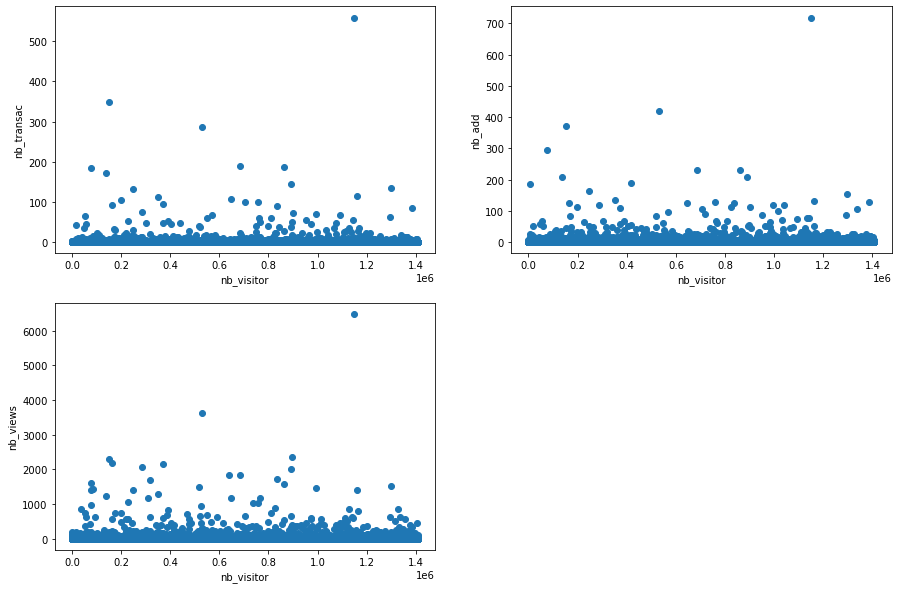

In [51]:
# Nuage de points pour voir les différents groupes 

plt.figure(figsize=(15,10))

plt.subplot(221)
plt.scatter(x='index', y='nb_transactions', data=stats1)
plt.xlabel('nb_visitor')
plt.ylabel('nb_transac');

# nb_visites nb_add
plt.subplot(222)
plt.scatter(x='index', y='nb_addtocarts', data=stats1)
plt.xlabel('nb_visitor')
plt.ylabel('nb_add');

# nb_visites nb_view
plt.subplot(223)
plt.scatter(x='index', y='nb_views', data=stats1)
plt.xlabel('nb_visitor')
plt.ylabel('nb_views');

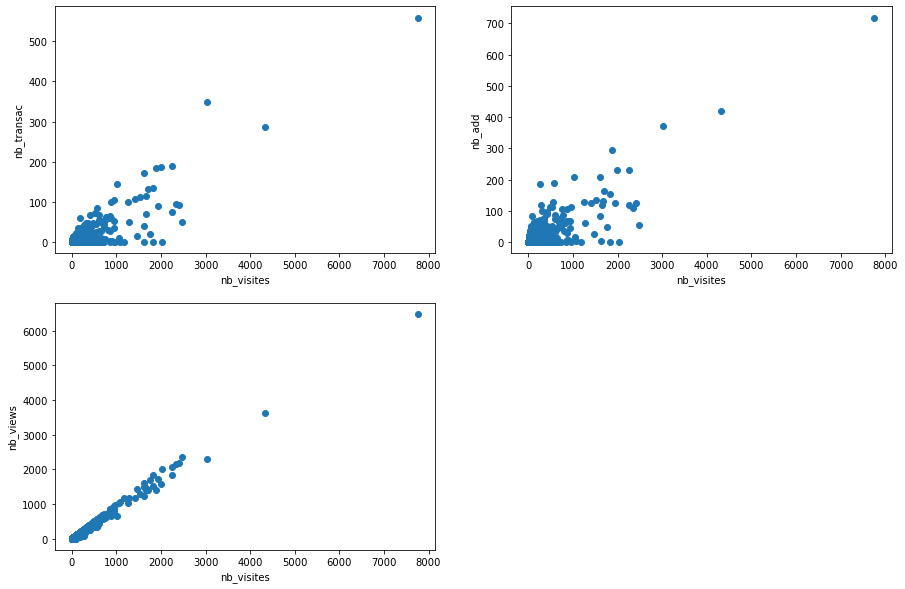

In [20]:
# nb_visites nb_transac
# Faire des beaux nuages de points en fonctions des différents clusters

plt.figure(figsize=(15,10))

plt.subplot(221)
plt.scatter(x='nb_visites', y='nb_transactions', data=stats1)
plt.xlabel('nb_visites')
plt.ylabel('nb_transac');

# nb_visites nb_add
plt.subplot(222)
plt.scatter(x='nb_visites', y='nb_addtocarts', data=stats1)
plt.xlabel('nb_visites')
plt.ylabel('nb_add');

# nb_visites nb_view
plt.subplot(223)
plt.scatter(x='nb_visites', y='nb_views', data=stats1)
plt.xlabel('nb_visites')
plt.ylabel('nb_views');

In [68]:
# faire un cluster que sur les acheteurs ? 

buyers=stats.dropna()

In [69]:
buyers

,nb_visites,nb_views,nb_addtocarts,nb_transactions
visitorid,,,,
172,38,33.0,3.0,2.0
186,4,2.0,1.0,1.0
264,7,3.0,2.0,2.0
419,6,4.0,1.0,1.0
539,7,4.0,2.0,1.0
...,...,...,...,...
1406564,3,1.0,1.0,1.0
1406708,24,20.0,3.0,1.0
1406981,6,4.0,1.0,1.0


In [90]:
buyers['index']=buyers.index

buyers

<ipython-input-90-e26a7fd00c2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buyers['index']=buyers.index


,nb_visites,nb_views,nb_addtocarts,nb_transactions,index
visitorid,,,,,
172,38,33.0,3.0,2.0,172
186,4,2.0,1.0,1.0,186
264,7,3.0,2.0,2.0,264
419,6,4.0,1.0,1.0,419
539,7,4.0,2.0,1.0,539
...,...,...,...,...,...
1406564,3,1.0,1.0,1.0,1406564
1406708,24,20.0,3.0,1.0,1406708
1406981,6,4.0,1.0,1.0,1406981


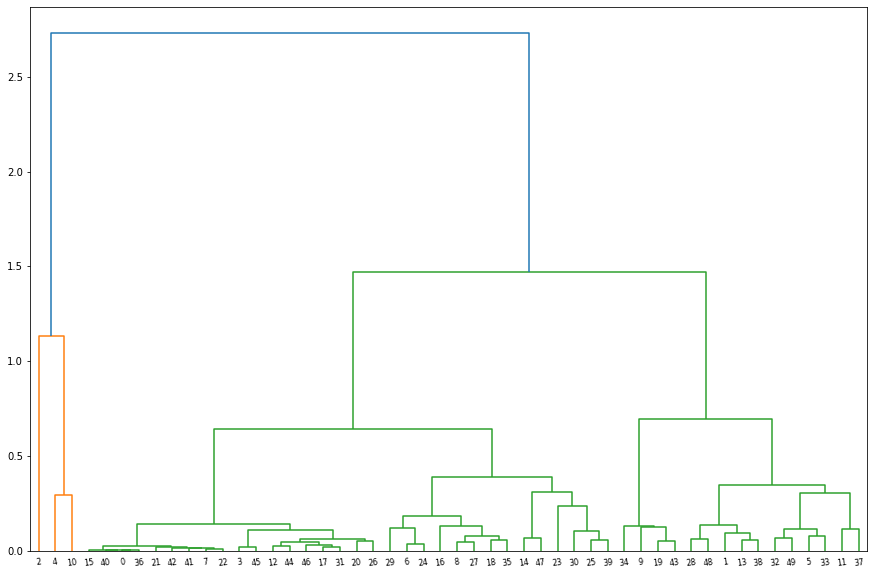

In [46]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
data_norm = pd.DataFrame(minmax.fit_transform(buyers))

from sklearn.cluster import KMeans 

km = KMeans(n_clusters =50,random_state=500)
km.fit(data_norm)

# Centroids and labels
centroids = km.cluster_centers_
labels = km.labels_

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(15, 10))
Z = linkage(centroids, method = 'ward', metric = 'euclidean')
dendrogram(Z, leaf_rotation = 7)
plt.show()

In [48]:
buyers['labels_clusters']=labels

buyers

<ipython-input-48-a3983ada9097>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buyers['labels_clusters']=labels


,nb_visites,nb_views,nb_addtocarts,nb_transactions,labels_clusters
visitorid,,,,,
172,38,33.0,3.0,2.0,15
186,4,2.0,1.0,1.0,0
264,7,3.0,2.0,2.0,40
419,6,4.0,1.0,1.0,0
539,7,4.0,2.0,1.0,0
...,...,...,...,...,...
1406564,3,1.0,1.0,1.0,0
1406708,24,20.0,3.0,1.0,15
1406981,6,4.0,1.0,1.0,0


In [93]:
# On va sortir un df sur les moyens et les gros 

petit=buyers.loc[(buyers['nb_transactions']>=3)]

petit['nb_transactions'].value_counts()


#visit_item['class']=visit_item['nb_transac'].apply(lambda x: 0 if x<=0 else (1 if x<=5 else 2))

#verif_1=DF.loc[(DF['visitorid']==172)]


3.0      416
4.0      210
5.0       79
6.0       65
8.0       27
        ... 
100.0      1
107.0      1
67.0       1
145.0      1
52.0       1
Name: nb_transactions, Length: 74, dtype: int64

In [57]:
high_buyers=buyers.sort_values(by='nb_transactions', ascending=False)

In [58]:
high_buyers.head(60)

,nb_visites,nb_views,nb_addtocarts,nb_transactions,labels_clusters
visitorid,,,,,
1150086,7757,6479.0,719.0,559.0,2
152963,3024,2304.0,371.0,349.0,10
530559,4328,3623.0,419.0,286.0,4
684514,2246,1826.0,231.0,189.0,43
861299,1991,1573.0,230.0,188.0,19
76757,1883,1402.0,296.0,185.0,34
138131,1611,1231.0,207.0,173.0,9
890980,1017,662.0,210.0,145.0,23
1297062,1822,1531.0,155.0,136.0,1


In [59]:
high_buyers.describe()

,nb_visites,nb_views,nb_addtocarts,nb_transactions,labels_clusters
count,10228.000000,10228.000000,10228.000000,10228.00000,10228.000000
mean,21.743938,17.070102,2.641377,2.03246,12.543312
std,134.267082,114.649373,12.650829,9.46581,17.010283
min,3.000000,1.000000,1.000000,1.00000,0.000000
25%,4.000000,2.000000,1.000000,1.00000,0.000000
50%,7.000000,4.000000,1.000000,1.00000,0.000000
75%,13.000000,10.000000,2.000000,1.00000,36.000000
max,7757.000000,6479.000000,719.000000,559.00000,49.000000


In [64]:
big=buyers.loc[buyers['labels_clusters']==4]

big

,nb_visites,nb_views,nb_addtocarts,nb_transactions,labels_clusters
visitorid,,,,,
530559,4328,3623.0,419.0,286.0,4


In [61]:
# ça sera à nous de définir les classes on sait qu'il y en a 3 
# la moyenne des transactions est basse car il y a beaucoup de petits acheteurs et très peu de gros acheteurs 

high_buyers['nb_transactions'].value_counts()

1.0      7766
2.0      1467
3.0       416
4.0       210
5.0        79
         ... 
559.0       1
25.0        1
50.0        1
62.0        1
188.0       1
Name: nb_transactions, Length: 76, dtype: int64

In [5]:
## MELISSA 09/01 ##
import statsmodels.api

print("On s'intéresse à la relation entre la variable catégorielle 'event' et la variable transactionid, pour savoir si le comportement du consomateur à un impact sur les transactions.") 

print("Relation entre la variable continue transactionid et la variable catégorielle event.")
print("Pour étudier ce type de corrélation on a recours à l’analyse de la variance (ANOVA).")

result = statsmodels.formula.api.ols('transactionid ~ event', data = df).fit()
table_eventXtransactionid = statsmodels.api.stats.anova_lm(result)

print("df renesigne le degré de liberté de la statistique de test Fqui suit une loi de Fisher; PR(>F) renseigne la valeur de la p-valeur du test.")
print("Celle-ci est supérieure à 50%. On ne peut donc pas conclure à une relation d'influence entre la var. event et la var. transactionid ")

print("On voit qu'il n'y a pas de relation entre la variable 'event' et la variable 'transactionid'.")
print("On va donc découper la variable catégorielle event pour voir si à l'intérieur de chaque comportement (nb_view, nb_addtocart, nb_transaction),") 
print("si il y a des relations entre ces nouvelles variables quantitatives")

table_eventXtransactionid

On s'intéresse à la relation entre la variable catégorielle 'event' et la variable transactionid, pour savoir si le comportement du consomateur à un impact sur les transactions.
Relation entre la variable continue transactionid et la variable catégorielle event.
Pour étudier ce type de corrélation on a recours à l’analyse de la variance (ANOVA).
df renesigne le degré de liberté de la statistique de test Fqui suit une loi de Fisher; PR(>F) renseigne la valeur de la p-valeur du test.
Celle-ci est supérieure à 50%. On ne peut donc pas conclure à une relation d'influence entre la var. event et la var. transactionid 
On voit qu'il n'y a pas de relation entre la variable 'event' et la variable 'transactionid'.
On va donc découper la variable catégorielle event pour voir si à l'intérieur de chaque comportement (nb_view, nb_addtocart, nb_transaction),
si il y a des relations entre ces nouvelles variables quantitatives


,df,sum_sq,mean_sq,F,PR(>F)
event,2.0,3.484181e+07,1.742090e+07,0.669982,0.511728
Residual,22455.0,5.838761e+11,2.600205e+07,NaN,NaN


In [6]:
result = statsmodels.formula.api.ols('itemid ~ event', data = df).fit()
table_eventXitemid = statsmodels.api.stats.anova_lm(result)

print("df renesigne le degré de liberté de la statistique de test Fqui suit une loi de Fisher; PR(>F) renseigne la valeur de la p-valeur du test.")
print("Cette fois-ci, la p-value (PR(>F)) est inférieur à 5% donc on rejette l'hypothèse selon laquelle event n'influe pas sur itemid.")

table_eventXitemid

df renesigne le degré de liberté de la statistique de test Fqui suit une loi de Fisher; PR(>F) renseigne la valeur de la p-valeur du test.
Cette fois-ci, la p-value (PR(>F)) est inférieur à 5% donc on rejette l'hypothèse selon laquelle event n'influe pas sur itemid.


,df,sum_sq,mean_sq,F,PR(>F)
event,2.0,4.217666e+11,2.108833e+11,11.710356,0.000008
Residual,2756098.0,4.963256e+16,1.800827e+10,NaN,NaN


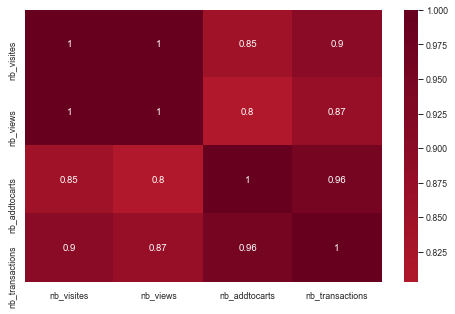

In [7]:
# DATAVIZ 2
## SOOYOUNG 06/02 ##
plt.figure(figsize=(8,5))
sns.heatmap(stats.corr(), annot=True, cmap='RdBu_r', center=0);

Relation entre les variables nombre de addtocarts et nombre de transactions


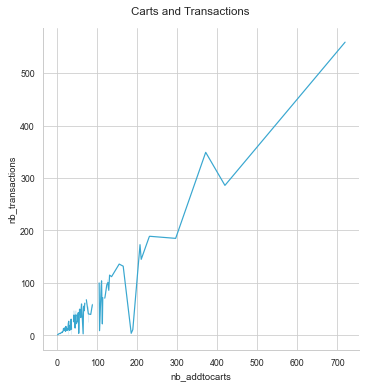

In [8]:
# DATAVIZ 3
## SOOYOUNG 09/01 ##
print("Relation entre les variables nombre de addtocarts et nombre de transactions")
g = sns.relplot(x="nb_addtocarts", 
                y="nb_transactions",
                data=stats,
                kind="line",
                markers=True,
                dashes=False)
g.fig.suptitle("Carts and Transactions",y=1.03)
plt.show()


In [9]:
# DATAVIZ 3 - Stats
# Calculate Pearson's correlation
from scipy.stats import pearsonr
stats = stats.fillna(0)
pd.DataFrame(pearsonr(stats['nb_addtocarts'], stats['nb_transactions']), index=['pearson_coeff', 'p-value'], columns=['Relation entre nb_addtocarts et nb_transactions'])

,Relation entre nb_addtocarts et nb_transactions
pearson_coeff,0.903854
p-value,0.000000


In [10]:
# DATAVIZ 3 - Stats
pd.DataFrame(pearsonr(stats['nb_views'], stats['nb_transactions']), index=['pearson_coef','p-value'], columns = ['Relation entre nb_views et nb_transactions'])


,Relation entre nb_views et nb_transactions
pearson_coef,0.782903
p-value,0.000000


In [117]:
## OCEANE & Melissa 03/04/2021 ## 

# Nombre de views par visitorid, par item 
visit_view = df.loc[df['event'] == 'view'].groupby(by=['visitorid','itemid'], as_index=False).agg({'event':'count'})
visit_view = visit_view.rename(columns={"event": "nb_view"})
visit_view.sort_values('nb_view', ascending=False)

# Nombre de paniers par visitorid, par item 
visit_add = df.loc[df['event'] == 'addtocart'].groupby(by=['visitorid','itemid'], as_index=False).agg({'event':'count'})
visit_add = visit_add.rename(columns={"event": "nb_addtocart"})
visit_add.sort_values('nb_addtocart', ascending=False)

# Nombre de transacs par visitorid, par item 
visit_transac = df.loc[df['event'] == 'transaction'].groupby(by=['visitorid','itemid'], as_index=False).agg({'event':'count'})
visit_transac = visit_transac.rename(columns={"event": "nb_transac"})
visit_transac.sort_values('nb_transac', ascending=False)

visit_item=pd.merge(visit_view, visit_add, how='outer')
visit_item=pd.merge(visit_item, visit_transac, how='outer')
visit_item.sort_values(['nb_transac','nb_addtocart', 'nb_view','visitorid', 'itemid'], ascending=[False, False, False, False, False])
visit_item.sort_values(by='nb_transac', ascending=False)

,visitorid,itemid,nb_view,nb_addtocart,nb_transac
231334,152963,119736,18.0,NaN,14.0
806384,530559,119736,19.0,9.0,9.0
1003673,660393,224549,9.0,6.0,5.0
1782155,1172087,312728,6.0,NaN,5.0
2070162,1365706,227311,4.0,5.0,5.0
...,...,...,...,...,...
2144647,1407512,54141,NaN,1.0,NaN
2144648,1407512,107832,NaN,1.0,NaN
2144649,1407512,241408,NaN,1.0,NaN
2144650,1407512,290723,NaN,1.0,NaN


In [118]:
visit_item=visit_item.drop(['nb_view','nb_addtocart'], axis=1)

visit_item

,visitorid,itemid,nb_transac
0,0,67045,NaN
1,0,285930,NaN
2,0,357564,NaN
3,1,72028,NaN
4,2,216305,NaN
...,...,...,...
2145174,1385073,119736,2.0
2145175,1385073,352230,1.0
2145176,1385073,369158,1.0
2145177,1385073,400077,1.0


In [120]:
visit_item=visit_item.dropna()

visit_item

,visitorid,itemid,nb_transac
236,172,10034,1.0
257,172,465522,1.0
272,186,49029,1.0
363,264,161949,1.0
364,264,459835,1.0
...,...,...,...
2145174,1385073,119736,2.0
2145175,1385073,352230,1.0
2145176,1385073,369158,1.0
2145177,1385073,400077,1.0


In [140]:
one_shot=visit_item.loc[(visit_item['nb_transac']==1)]

#petit=buyers.loc[(buyers['nb_transactions']>=3)]

In [142]:
more_shot=visit_item.loc[(visit_item['nb_transac']>=2)]

In [14]:
#visit_item['class']=visit_item['nb_transac'].apply(lambda x: 0 if x<=0 else (1 if x<=5 else 2))

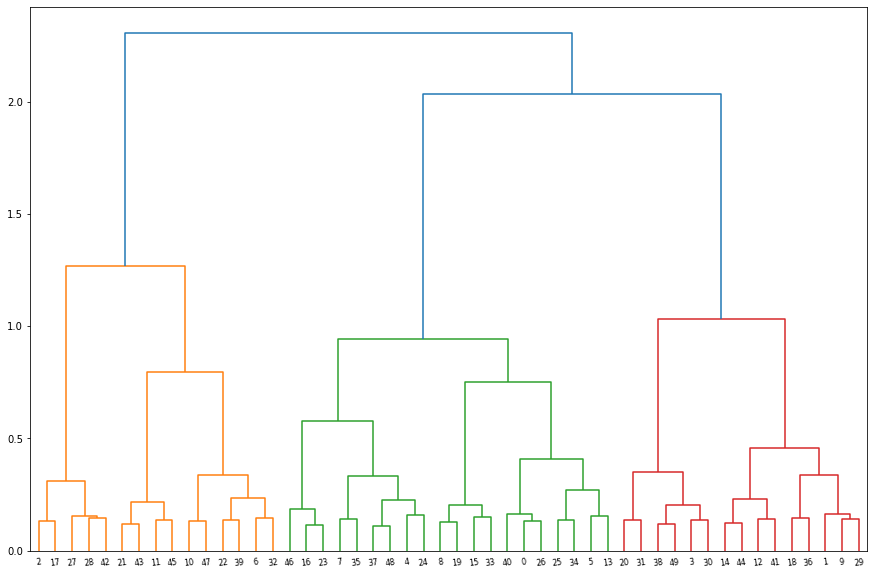

In [143]:
#Dendogramme du one shot on en repère 3 

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
data_norm = pd.DataFrame(minmax.fit_transform(one_shot))

from sklearn.cluster import KMeans 

km = KMeans(n_clusters =50,random_state=500)
km.fit(data_norm)

# Centroids and labels
centroids = km.cluster_centers_
labels = km.labels_

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(15, 10))
Z = linkage(centroids, method = 'ward', metric = 'euclidean')
dendrogram(Z, leaf_rotation = 7)
plt.show()

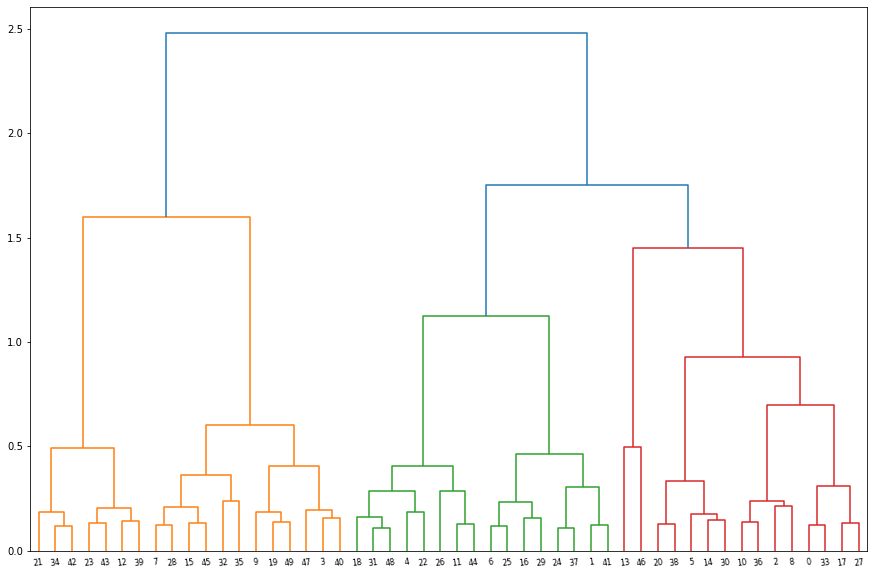

In [144]:
#Dendogramme du more shot on en repère 5 


from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
data_norm = pd.DataFrame(minmax.fit_transform(more_shot))

from sklearn.cluster import KMeans 

km = KMeans(n_clusters =50,random_state=500)
km.fit(data_norm)

# Centroids and labels
centroids = km.cluster_centers_
labels = km.labels_

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(15, 10))
Z = linkage(centroids, method = 'ward', metric = 'euclidean')
dendrogram(Z, leaf_rotation = 7)
plt.show()

In [147]:
# parmi les one shot on a voulu savoir le nb d'item par transactions 

nb_item_one=one_shot.groupby(by=['visitorid','nb_transac']).agg({'itemid':'count'})

nb_item_one

,,itemid
visitorid,nb_transac,
172,1.0,2
186,1.0,1
264,1.0,2
419,1.0,1
539,1.0,1
...,...,...
1406787,1.0,1
1406981,1.0,1
1407070,1.0,1


In [148]:
# Trouver une solution car Length of values (986) does not match length of index (11258)

nb_item_one['labels']=labels

ValueError: Length of values (986) does not match length of index (11258)

In [135]:
visit_item_transac.describe()

,visitorid,itemid,nb_transac,labels_item_transac
count,9.860000e+02,986.000000,986.000000,986.000000
mean,7.200546e+05,236616.902637,2.203854,23.320487
std,4.158683e+05,134510.991766,0.666855,14.211482
min,4.537000e+03,147.000000,2.000000,0.000000
25%,3.308650e+05,119736.000000,2.000000,11.000000
50%,7.614820e+05,245818.000000,2.000000,22.000000
75%,1.105703e+06,353063.000000,2.000000,36.000000
max,1.406087e+06,466109.000000,14.000000,49.000000


In [134]:
visit_item_transac.sort_values(by='nb_transac', ascending=False)

,visitorid,itemid,nb_transac,labels_item_transac
231334,152963,119736,14.0,13
806384,530559,119736,9.0,46
2098756,1385029,382885,5.0,32
114496,76757,119736,5.0,14
2070162,1365706,227311,5.0,35
...,...,...,...,...
900388,591869,134727,2.0,10
901275,592247,332018,2.0,1
903740,593905,14520,2.0,27
903745,593905,334920,2.0,1


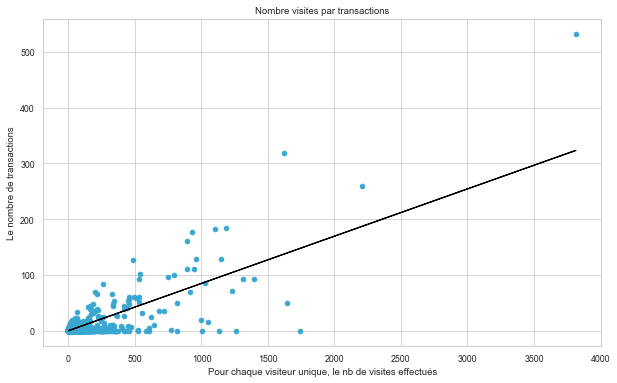

In [14]:
# DATAVIZ 4
## OCEANE ##
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict, cross_validate

# On va faire un groupement des visitors qui achètent le plus 
visitor_transaction=visit_item.groupby(by='visitorid').agg({'nb_transac':'count', 'visitorid':'count'}).rename(columns={'visitorid':'nb_de_visit'})

nb_transactions=visitor_transaction['nb_transac']
view_by_visitor=visitor_transaction[['nb_de_visit']]

slr=LinearRegression()
slr.fit(view_by_visitor, nb_transactions)
cross_validate(slr, view_by_visitor, nb_transactions, return_train_score=True, cv=4)['test_score'].mean()

pred_transac = slr.predict(view_by_visitor)
residus = pred_transac - nb_transactions

plt.figure(figsize=(10,6))
plt.scatter(x='nb_de_visit', y='nb_transac', data=visitor_transaction)
plt.xlabel('Pour chaque visiteur unique, le nb de visites effectués')
plt.ylabel('Le nombre de transactions')
plt.title('Nombre visites par transactions');
plt.plot(view_by_visitor, pred_transac, color="black");

In [15]:
# DATAVIZ 4 - Stats
# Test de Pearson ? 
print("la p-value < 5%, le coefficient est proche de 1, il y a une corrélation entre les deux variables.")
print("Lorsque le nombre de view augmentent les transactions augmentent aussi.")

pd.DataFrame(pearsonr(visitor_transaction['nb_de_visit'],visitor_transaction['nb_transac']), index = ['pearson_coeff','p-value'], columns = ['resultat_test'])


la p-value < 5%, le coefficient est proche de 1, il y a une corrélation entre les deux variables.
Lorsque le nombre de view augmentent les transactions augmentent aussi.


,resultat_test
pearson_coeff,0.777609
p-value,0.000000


In [16]:
## SOOYOUNG 09/01 ##
# Nombre de visites par itemsid
items = df.groupby('itemid').agg({'visitorid':'count'})
items = items.rename(columns={"visitorid": "nb_visites"})

# Nombre de views par itemid
items_view = df.loc[df['event'] == 'view'].groupby('itemid').agg({'itemid':'count'}) #df.loc[df['itemid'] == 9]
items_view = items_view.rename(columns={"itemid": "nb_views"})

# Nombre de addtocarts par itemid
items_addtocart = df.loc[df['event'] == 'addtocart'].groupby('itemid').agg({'itemid':'count'})
items_addtocart = items_addtocart.rename(columns={"itemid": "nb_addtocarts"})

# Nombre de transactions par itemid
items_transaction = df.loc[df['event'] == 'transaction'].groupby('itemid').agg({'itemid':'count'})
items_transaction = items_transaction.rename(columns={"itemid": "nb_transactions"})

# Merge dataframes
items = pd.merge(items, items_view, left_index=True, right_index=True, how='left')
items = pd.merge(items, items_addtocart, left_index=True, right_index=True, how='left')
items = pd.merge(items, items_transaction, left_index=True, right_index=True, how='left')
items

# Remplaçons les Nans par 0 
items = items.fillna(0)
# Vérifions que les Nans ont bien été remplacé
items.isnull().sum(axis = 0)


nb_visites         0
nb_views           0
nb_addtocarts      0
nb_transactions    0
dtype: int64

In [12]:
## SOOYOUNG 30/01 ##
n_produits = 20

# les 20 produits plus achetés
top_produits_vendus = items.sort_values(by='nb_transactions', ascending=False).head(n_produits)
top_produits_vendus['cat_produits_plus_vendus'] = "1"
top_produits_vendus = top_produits_vendus.drop(columns=['nb_visites', 'nb_views', 'nb_addtocarts'])

# les 20 produits plus mis au panier
top_produits_paniers = items.sort_values(by='nb_addtocarts', ascending=False).head(n_produits)
top_produits_paniers['cat_produits_plus_mis_panier'] = "1"
top_produits_paniers = top_produits_paniers.drop(columns=['nb_visites', 'nb_views', 'nb_transactions'])

# les 20 produits plus vus
top_produits_vus = items.sort_values(by='nb_views', ascending=False).head(n_produits)
top_produits_vus['cat_produits_plus_vus'] = "1"
top_produits_vus = top_produits_vus.drop(columns=['nb_visites', 'nb_addtocarts', 'nb_transactions'])

# Merge les 3 dataframes OUTER
top_produits = pd.merge(top_produits_vendus, top_produits_paniers, left_index=True, right_index=True, how='outer')
top_produits = pd.merge(top_produits, top_produits_vus, left_index=True, right_index=True, how='outer')

top_produits = top_produits[['nb_views', 'nb_addtocarts', 'nb_transactions', 'cat_produits_plus_vus', 'cat_produits_plus_mis_panier', 'cat_produits_plus_vendus']]
top_produits.head()

,nb_views,nb_addtocarts,nb_transactions,cat_produits_plus_vus,cat_produits_plus_mis_panier,cat_produits_plus_vendus
itemid,,,,,,
5411,2325.0,NaN,NaN,1,NaN,NaN
7943,1346.0,97.0,46.0,1,1,1
9877,NaN,70.0,NaN,NaN,1,NaN
17478,NaN,72.0,37.0,NaN,1,1
29196,NaN,136.0,NaN,NaN,1,NaN


/Users/sooyounglee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


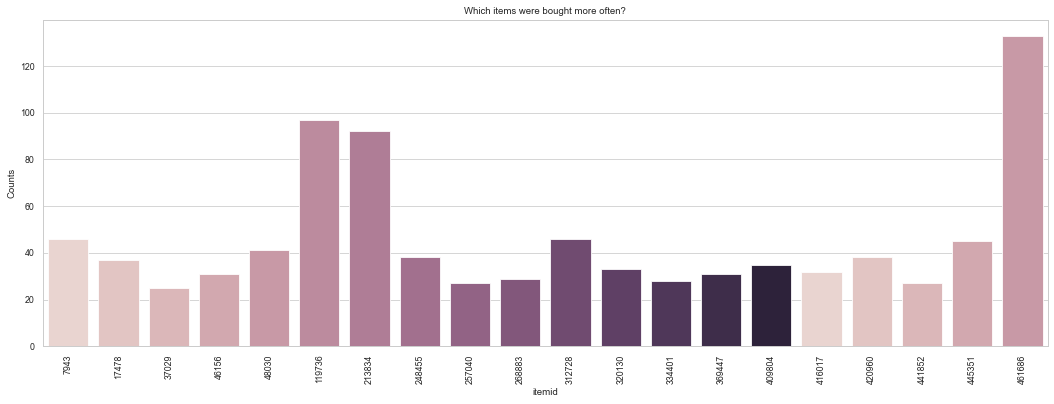

In [18]:
# DATAVIZ 6
## MELISSA ##
plt.figure(figsize=(18,6))
sns.barplot(top_produits_vendus.index, top_produits_vendus.nb_transactions, palette=sns.cubehelix_palette(15))
plt.ylabel("Counts")
plt.title("Which items were bought more often?");
plt.xticks(rotation=90);

Nous pouvons constater que l'item 461686, produit star, est plus populaire au mois de juillet et août
l'item 119736 est plus populaire au mois de juin et août
l'item 213834 est plus populaire au mois de juillet
l'item 312728 est plus populaire durant l'été


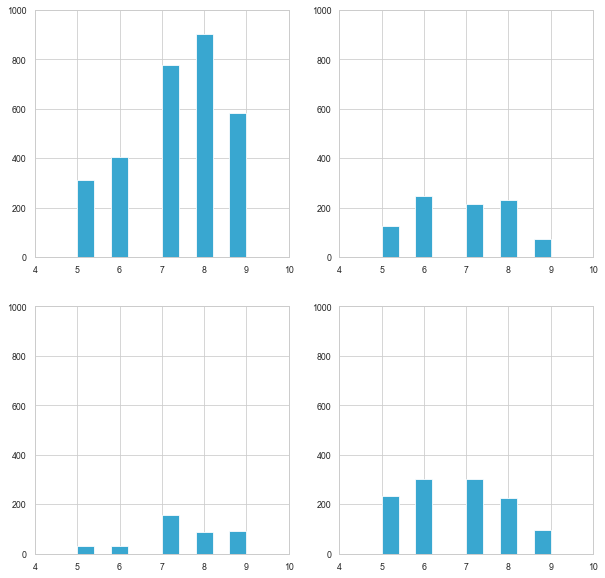

In [28]:
# DATAVIZ 7
## SADALI ##
# Etudier l'évolution des 4 items les plus achetés par rapport au mois  
l = {461686,119736}
max_item_1 = df.loc[df['itemid']==461686] 
max_item_2 = df.loc[df['itemid']==119736]
max_item_3 = df.loc[df['itemid']==213834]
max_item_4 = df.loc[df['itemid']==312728]


fig = plt.figure(figsize=(10,10))

plt.subplot(221)
plt.axis([4,10,0,1000])
plt.hist(max_item_1.month);

plt.subplot(222)
plt.axis([4,10,0,1000])
plt.hist(max_item_2.month);

plt.subplot(223)
plt.axis([4,10,0,1000])
plt.hist(max_item_3.month);

plt.subplot(224)
plt.axis([4,10,0,1000])
plt.hist(max_item_4.month);

print("Nous pouvons constater que l'item 461686, produit star, est plus populaire au mois de juillet et août")
print("l'item 119736 est plus populaire au mois de juin et août")
print("l'item 213834 est plus populaire au mois de juillet")
print("l'item 312728 est plus populaire durant l'été")

In [38]:
## SADALI ##
items = items.fillna(0)
print("p-value = 0<0.05 On rejette H0 : les deux variables ne sont donc pas indépendantes")
print("coefficient de pearson = 0.540263 : Les deux variables sont moyennement corrélées.")
pd.DataFrame(pearsonr(items['nb_views'], items['nb_transactions']), index=['pearson_coef','p-value'], columns = ['resultat_test_items'])



p-value = 0<0.05 On rejette H0 : les deux variables ne sont donc pas indépendantes
coefficient de pearson = 0.540263 : Les deux variables sont moyennement corrélées.


,resultat_test_items
pearson_coef,0.540263
p-value,0.000000


In [13]:
## SOOYOUNG 30/01 ##
# Si un produit est dans les 3 catégories plus vus, plus mis, plus vendus, 
# le produit sera classé 3 étoiles dans cat_produits_recommandations
top_produits = top_produits.fillna(0)
top_produits['stars_produits_recommandations'] = top_produits['cat_produits_plus_vus'].astype(int) + top_produits['cat_produits_plus_mis_panier'].astype(int) + top_produits['cat_produits_plus_vendus'].astype(int)

top_produits = top_produits.sort_values(by='stars_produits_recommandations', ascending=False)
top_produits


,nb_views,nb_addtocarts,nb_transactions,cat_produits_plus_vus,cat_produits_plus_mis_panier,cat_produits_plus_vendus,stars_produits_recommandations
itemid,,,,,,,
461686,2539.0,306.0,133.0,1,1,1,3
37029,1131.0,71.0,25.0,1,1,1,3
234255,1214.0,77.0,16.0,1,1,1,3
257040,1531.0,89.0,27.0,1,1,1,3
312728,947.0,162.0,46.0,1,1,1,3
...,...,...,...,...,...,...,...
301721,0.0,0.0,18.0,0,0,1,1
112782,1094.0,0.0,0.0,1,0,0,1
111530,1397.0,0.0,0.0,1,0,0,1


In [3]:
#Travailler le dataset avec le temps vision globale

from datetime import datetime

df['date_courte']=df['date'].apply(lambda x: x.strftime("%m/%Y"))

In [4]:
data=df.groupby(by=['date_courte', 'event']).agg({'event':'count'}).rename(columns={'event': 'nb_event'})
data=data.unstack()

data['addtocart/view']=(data.nb_event.addtocart/data.nb_event.view*100)
data['view/transaction']=(data.nb_event.transaction/data.nb_event.view*100)
data['transaction/addtocart']=(data.nb_event.transaction/data.nb_event.addtocart*100)

data

# Ce qu'il faut retenir du tableau c'est que le taux de conversion entre view et add ne dépasse pas les 3%
# Pour le taux de conversion view transaction ne dépasse pas 1%
# Par contre pour le taux de conversion transaction/ addtocart c'est 33%

nb_event                     addtocart/view view/transaction  \
event       addtocart transaction    view                                   
date_courte                                                                 
05/2015         14321        4594  569735       2.513625         0.806340   
06/2015         15081        5038  589681       2.557484         0.854360   
07/2015         17372        5807  675175       2.572963         0.860073   
08/2015         14809        4621  533943       2.773517         0.865448   
09/2015          7749        2397  295778       2.619870         0.810405   

            transaction/addtocart  
event                              
date_courte                        
05/2015                 32.078765  
06/2015                 33.406273  
07/2015                 33.427354  
08/2015                 31.203998  
09/2015                 30.933024

In [7]:
from datetime import datetime

df['date_jour']=df['date'].apply(lambda x: x.strftime("%d/%m/%y"))
df['heure']=df['date'].dt.hour

data1=df.groupby(by=['date_jour', 'event', 'heure']).agg({'event':'count'}).rename(columns={'event': 'nb_event'}).sort_values(by='date_jour', ascending=False)

data1=data1.unstack()
data1

nb_event                                          \
heure                       0       1       2       3       4       5    
date_jour event                                                          
01/06/15  addtocart       17.0    31.0    23.0    26.0    22.0    14.0   
          transaction      8.0     9.0    10.0     7.0     7.0    12.0   
          view           920.0  1017.0  1065.0  1072.0  1094.0  1062.0   
01/07/15  addtocart       35.0    27.0    19.0    22.0    22.0    24.0   
          transaction     11.0    11.0     6.0     6.0     4.0     6.0   
...                        ...     ...     ...     ...     ...     ...   
31/07/15  transaction     13.0    13.0    17.0     7.0     5.0     9.0   
          view          1262.0  1014.0  1059.0   833.0   872.0   843.0   
31/08/15  addtocart       29.0    30.0    33.0    21.0    36.0    30.0   
          transaction     11.0    14.0     6.0    14.0     7.0    12.0   
          view          1040.0   971.0   947.0   986.0  1003.0  1048.0   

                                                    ...                       \
heure                      6      7      8      9   ...     14     15     16   
date_jour event                                     ...                        
01/06/15  addtocart      22.0    7.0    7.0   31.0  ...   12.0   10.0    6.0   
          transaction    12.0    2.0    2.0    4.0  ...    NaN    2.0    1.0   
          view         1078.0  763.0  525.0  291.0  ...  266.0  419.0  623.0   
01/07/15  addtocart      19.0   25.0   12.0    5.0  ...    2.0    8.0   18.0   
          transaction     1.0   13.0    3.0    NaN  ...    NaN    2.0    6.0   
...                       ...    ...    ...    ...  ...    ...    ...    ...   
31/07/15  transaction     8.0    2.0    2.0    2.0  ...    NaN    NaN    NaN   
          view          803.0  722.0  554.0  363.0  ...  240.0  360.0  600.0   
31/08/15  addtocart      18.0   14.0    5.0    5.0  ...    5.0    1.0   14.0   
          transaction     7.0    3.0    1.0    NaN  ...    2.0    NaN    4.0   
          view          889.0  737.0  514.0  265.0  ...  188.0  325.0  555.0   

                                                                               
heure                      17      18      19      20      21      22      23  
date_jour event                                                                
01/06/15  addtocart      22.0    25.0    63.0    49.0    49.0    37.0    28.0  
          transaction     7.0     9.0    22.0    29.0    21.0     9.0    16.0  
          view         1075.0  1376.0  1633.0  1579.0  1520.0  1522.0  1679.0  
01/07/15  addtocart      20.0    23.0    38.0    39.0    33.0    35.0    59.0  
          transaction    12.0     6.0    21.0    24.0    18.0    19.0    20.0  
...                       ...     ...     ...     ...     ...     ...     ...  
31/07/15  transaction    10.0    12.0    10.0    18.0    13.0    16.0    16.0  
          view          937.0  1254.0  1221.0  1310.0   882.0  1336.0  1301.0  
31/08/15  addtocart      16.0    23.0    38.0    22.0    30.0    30.0    38.0  
          transaction     9.0     8.0     8.0    15.0    14.0    14.0    22.0  
          view          916.0  1001.0  1120.0  1177.0  1162.0  1365.0  1251.0  

[417 rows x 24 columns]

In [9]:
data2=df.groupby(by=['date_jour', 'event', 'itemid']).agg({'event':'count'}).rename(columns={'event': 'nb_event'}).sort_values(by='date_jour', ascending=False)

data2=data2.unstack()
data2

nb_event                                            \
itemid                  3      4      6      9      15     16     17       
date_jour event                                                            
01/06/15  addtocart        NaN    NaN    NaN    NaN    NaN    NaN    NaN   
          transaction      NaN    NaN    NaN    NaN    NaN    NaN    NaN   
          view             NaN    NaN    1.0    NaN    NaN    NaN    NaN   
01/07/15  addtocart        NaN    NaN    NaN    NaN    NaN    NaN    NaN   
          transaction      NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...                        ...    ...    ...    ...    ...    ...    ...   
31/07/15  transaction      NaN    NaN    NaN    NaN    NaN    NaN    NaN   
          view             NaN    NaN    NaN    NaN    NaN    NaN    NaN   
31/08/15  addtocart        NaN    NaN    NaN    NaN    NaN    NaN    NaN   
          transaction      NaN    NaN    NaN    NaN    NaN    NaN    NaN   
          view             1.0    1.0    NaN    NaN    NaN    NaN    NaN   

                                            ...                              \
itemid                19     22     24      ... 466849 466854 466857 466858   
date_jour event                             ...                               
01/06/15  addtocart      NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN   
          transaction    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN   
          view           NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN   
01/07/15  addtocart      NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN   
          transaction    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN   
...                      ...    ...    ...  ...    ...    ...    ...    ...   
31/07/15  transaction    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN   
          view           NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN   
31/08/15  addtocart      NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN   
          transaction    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN   
          view           3.0    NaN    NaN  ...    NaN    NaN    NaN    NaN   

                                                                 
itemid                466860 466861 466862 466863 466864 466867  
date_jour event                                                  
01/06/15  addtocart      NaN    NaN    NaN    NaN    NaN    NaN  
          transaction    NaN    NaN    NaN    NaN    NaN    NaN  
          view           NaN    NaN    NaN    NaN    3.0    1.0  
01/07/15  addtocart      NaN    1.0    NaN    NaN    NaN    NaN  
          transaction    NaN    NaN    NaN    NaN    NaN    NaN  
...                      ...    ...    ...    ...    ...    ...  
31/07/15  transaction    NaN    NaN    NaN    NaN    NaN    NaN  
          view           NaN    NaN    NaN    NaN    NaN    NaN  
31/08/15  addtocart      NaN    NaN    NaN    NaN    NaN    NaN  
          transaction    NaN    NaN    NaN    NaN    NaN    NaN  
          view           1.0    NaN    NaN    NaN    NaN    NaN  

[417 rows x 235061 columns]

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
DF=pd.read_csv('events.csv')

from datetime import datetime
DF['datetime']=DF['timestamp'].apply(lambda x: datetime.fromtimestamp(x/1000))

In [123]:
DF.head(11) #Dataframe classique

,timestamp,visitorid,event,itemid,transactionid,datetime
0,1433221332117,257597,view,355908,NaN,2015-06-02 07:02:12.117
1,1433224214164,992329,view,248676,NaN,2015-06-02 07:50:14.164
2,1433221999827,111016,view,318965,NaN,2015-06-02 07:13:19.827
3,1433221955914,483717,view,253185,NaN,2015-06-02 07:12:35.914
4,1433221337106,951259,view,367447,NaN,2015-06-02 07:02:17.106
5,1433224086234,972639,view,22556,NaN,2015-06-02 07:48:06.234
6,1433221923240,810725,view,443030,NaN,2015-06-02 07:12:03.240
7,1433223291897,794181,view,439202,NaN,2015-06-02 07:34:51.897
8,1433220899221,824915,view,428805,NaN,2015-06-02 06:54:59.221
9,1433221204592,339335,view,82389,NaN,2015-06-02 07:00:04.592


In [55]:
verif_1=DF.loc[(DF['visitorid']==172)]
verif_1.sort_values(by='datetime')

,timestamp,visitorid,event,itemid,transactionid,datetime
2322316,1436844676639,172,view,397068,NaN,2015-07-14 04:31:16.639
2322362,1436847461448,172,view,55710,NaN,2015-07-14 05:17:41.448
2334717,1436848482402,172,view,464731,NaN,2015-07-14 05:34:42.402
2339403,1436848648303,172,view,403998,NaN,2015-07-14 05:37:28.303
2321448,1436848805277,172,view,18519,NaN,2015-07-14 05:40:05.277
2321557,1436848871619,172,view,27248,NaN,2015-07-14 05:41:11.619
2334804,1436848932823,172,view,363106,NaN,2015-07-14 05:42:12.823
2339539,1436848989537,172,view,10034,NaN,2015-07-14 05:43:09.537
2334643,1436849146584,172,view,302810,NaN,2015-07-14 05:45:46.584
2331918,1436849172774,172,view,10034,NaN,2015-07-14 05:46:12.774


In [126]:
Gb_vtid=DF.groupby(by=['visitorid','transactionid'], as_index=False).agg({'datetime':'max', 'itemid':list})

In [127]:
#Vérif que il n'y ai pas de NaN

Gb_vtid['transactionid'].value_counts()

Gb_vtid['transactionid'].isna().any(axis=0)

False

In [128]:
Gb_vtid

,visitorid,transactionid,datetime,itemid
0,172,9725.0,2015-08-15 03:29:01.686,"[465522, 10034]"
1,186,8726.0,2015-08-12 18:34:57.040,[49029]
2,264,8445.0,2015-09-07 19:34:45.708,"[459835, 161949]"
3,419,16455.0,2015-07-29 07:03:12.695,[19278]
4,539,14778.0,2015-06-16 07:39:38.673,[94371]
...,...,...,...,...
17667,1406787,15915.0,2015-06-01 18:56:48.042,[336832]
17668,1406981,686.0,2015-05-19 00:28:21.266,[436004]
17669,1407070,5064.0,2015-05-14 00:41:15.160,[215596]
17670,1407110,3851.0,2015-08-05 01:11:25.624,[360922]


In [5]:
Gb_vevent=DF.loc[(DF['event']=='view') | (DF['event']=='addtocart')]

In [129]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
data_norm = pd.DataFrame(minmax.fit_transform(Gb_vtid))

from sklearn.cluster import KMeans 

km = KMeans(n_clusters =50,random_state=500)
km.fit(data_norm)

# Centroids and labels
centroids = km.cluster_centers_
labels = km.labels_

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(15, 10))
Z = linkage(centroids, method = 'ward', metric = 'euclidean')
dendrogram(Z, leaf_rotation = 7)
plt.show()

TypeError: invalid type promotion

In [6]:
Gb_vevent

,timestamp,visitorid,event,itemid,transactionid,datetime
0,1433221332117,257597,view,355908,NaN,2015-06-02 06:02:12.117
1,1433224214164,992329,view,248676,NaN,2015-06-02 06:50:14.164
2,1433221999827,111016,view,318965,NaN,2015-06-02 06:13:19.827
3,1433221955914,483717,view,253185,NaN,2015-06-02 06:12:35.914
4,1433221337106,951259,view,367447,NaN,2015-06-02 06:02:17.106
...,...,...,...,...,...,...
2756096,1438398785939,591435,view,261427,NaN,2015-08-01 04:13:05.939
2756097,1438399813142,762376,view,115946,NaN,2015-08-01 04:30:13.142
2756098,1438397820527,1251746,view,78144,NaN,2015-08-01 03:57:00.527
2756099,1438398530703,1184451,view,283392,NaN,2015-08-01 04:08:50.703


TypeError: string indices must be integers

In [7]:
Gb_vevent=Gb_vevent.groupby(by=['visitorid','event'], as_index=False).agg({'datetime':'max', 'itemid':list})

In [9]:
Gb_vevent

,visitorid,event,datetime,itemid
0,0,view,2015-09-11 22:55:17.175,"[285930, 357564, 67045]"
1,1,view,2015-08-13 19:46:06.444,[72028]
2,2,view,2015-08-07 20:20:57.845,"[216305, 325215, 342816, 325215, 342816, 25988..."
3,3,view,2015-08-01 09:10:35.296,[385090]
4,4,view,2015-09-15 23:24:27.167,[177677]
...,...,...,...,...
1441896,1407575,view,2015-06-10 23:46:08.922,[121220]
1441897,1407576,view,2015-06-03 17:01:29.991,[356208]
1441898,1407577,view,2015-05-17 23:48:04.867,[427784]
1441899,1407578,view,2015-05-17 03:21:23.288,[188736]


In [8]:
Gb_vtid['itemid']=Gb_vtid['itemid'].apply(tuple)
#Gb_vtid['itemid']

Gb_vevent['itemid']=Gb_vevent['itemid'].apply(tuple)
#Gb_vevent['itemid']

In [9]:
Suivi_conso=Gb_vtid.merge(Gb_vevent, on='visitorid', suffixes=('_buy', '_past_event'))

In [10]:
Suivi_conso.head(11)

,visitorid,transactionid,datetime_buy,itemid_buy,event,datetime_past_event,itemid_past_event
0,172,9725.0,2015-08-15 02:29:01.686,"(465522, 10034)",addtocart,2015-08-15 02:13:48.324,"(10034, 465522, 465522)"
1,172,9725.0,2015-08-15 02:29:01.686,"(465522, 10034)",view,2015-08-15 02:27:27.421,"(465522, 465522, 10034, 107943, 79918, 62300, ..."
2,186,8726.0,2015-08-12 17:34:57.040,"(49029,)",addtocart,2015-08-12 17:28:16.523,"(49029,)"
3,186,8726.0,2015-08-12 17:34:57.040,"(49029,)",view,2015-08-12 23:59:32.345,"(49029, 49029)"
4,264,8445.0,2015-09-07 18:34:45.708,"(459835, 161949)",addtocart,2015-09-07 18:31:06.184,"(459835, 161949)"
5,264,8445.0,2015-09-07 18:34:45.708,"(459835, 161949)",view,2015-09-07 18:31:02.509,"(459835, 161949, 161949)"
6,419,16455.0,2015-07-29 06:03:12.695,"(19278,)",addtocart,2015-07-29 04:47:53.631,"(19278,)"
7,419,16455.0,2015-07-29 06:03:12.695,"(19278,)",view,2015-07-29 05:03:49.136,"(19278, 426926, 19278, 46391)"
8,539,14778.0,2015-06-16 06:39:38.673,"(94371,)",addtocart,2015-06-16 06:42:04.128,"(94371, 94371)"
9,539,14778.0,2015-06-16 06:39:38.673,"(94371,)",view,2015-06-16 17:09:52.149,"(94371, 94371, 94371, 94371)"


In [18]:
Suivi_conso=Suivi_conso.sort_values(by=['visitorid','datetime_buy','itemid_buy'])

Suivi_conso

,visitorid,transactionid,datetime_buy,itemid_buy,event,datetime_past_event,itemid_past_event
0,172,9725.0,2015-08-15 02:29:01.686,"(465522, 10034)",addtocart,2015-08-15 02:13:48.324,"(10034, 465522, 465522)"
1,172,9725.0,2015-08-15 02:29:01.686,"(465522, 10034)",view,2015-08-15 02:27:27.421,"(465522, 465522, 10034, 107943, 79918, 62300, ..."
2,186,8726.0,2015-08-12 17:34:57.040,"(49029,)",addtocart,2015-08-12 17:28:16.523,"(49029,)"
3,186,8726.0,2015-08-12 17:34:57.040,"(49029,)",view,2015-08-12 23:59:32.345,"(49029, 49029)"
4,264,8445.0,2015-09-07 18:34:45.708,"(459835, 161949)",addtocart,2015-09-07 18:31:06.184,"(459835, 161949)"
...,...,...,...,...,...,...,...
33716,1407070,5064.0,2015-05-13 23:41:15.160,"(215596,)",addtocart,2015-05-14 19:11:26.810,"(215596, 80754, 183756)"
33717,1407070,5064.0,2015-05-13 23:41:15.160,"(215596,)",view,2015-05-14 00:10:49.765,"(80754,)"
33718,1407110,3851.0,2015-08-05 00:11:25.624,"(360922,)",addtocart,2015-08-05 00:05:35.724,"(360922,)"
33719,1407110,3851.0,2015-08-05 00:11:25.624,"(360922,)",view,2015-08-05 00:03:14.670,"(360922, 360922, 35493, 360922, 360922, 360922..."


In [49]:
verif=Suivi_conso.loc[Suivi_conso['visitorid']==172]

#Gb_vevent=DF.loc[(DF['event']=='view') | (DF['event']=='addtocart')]

In [50]:
verif

,visitorid,transactionid,datetime_buy,itemid_buy,event,datetime_past_event,itemid_past_event
0,172,9725.0,2015-08-15 02:29:01.686,"(465522, 10034)",addtocart,2015-08-15 02:13:48.324,"(10034, 465522, 465522)"
1,172,9725.0,2015-08-15 02:29:01.686,"(465522, 10034)",view,2015-08-15 02:27:27.421,"(465522, 465522, 10034, 107943, 79918, 62300, ..."


In [21]:
# Création colonne temps diff 

delta = Suivi_conso['datetime_buy']-Suivi_conso['datetime_past_event']
#Suivi_conso['diff_time']=divmod(delta.days * 86400 + delta.seconds, 60)

delta.apply(lambda x : divmod(x.days * 86400 + x.seconds, 60))

0           (15, 13)
1            (1, 34)
2            (6, 40)
3         (-385, 24)
4            (3, 39)
            ...     
33716    (-1171, 48)
33717      (-30, 25)
33718        (5, 49)
33719        (8, 10)
33720       (12, 37)
Length: 33721, dtype: object

In [22]:
Suivi_conso

,visitorid,transactionid,datetime_buy,itemid_buy,event,datetime_past_event,itemid_past_event
0,172,9725.0,2015-08-15 02:29:01.686,"(465522, 10034)",addtocart,2015-08-15 02:13:48.324,"(10034, 465522, 465522)"
1,172,9725.0,2015-08-15 02:29:01.686,"(465522, 10034)",view,2015-08-15 02:27:27.421,"(465522, 465522, 10034, 107943, 79918, 62300, ..."
2,186,8726.0,2015-08-12 17:34:57.040,"(49029,)",addtocart,2015-08-12 17:28:16.523,"(49029,)"
3,186,8726.0,2015-08-12 17:34:57.040,"(49029,)",view,2015-08-12 23:59:32.345,"(49029, 49029)"
4,264,8445.0,2015-09-07 18:34:45.708,"(459835, 161949)",addtocart,2015-09-07 18:31:06.184,"(459835, 161949)"
...,...,...,...,...,...,...,...
33716,1407070,5064.0,2015-05-13 23:41:15.160,"(215596,)",addtocart,2015-05-14 19:11:26.810,"(215596, 80754, 183756)"
33717,1407070,5064.0,2015-05-13 23:41:15.160,"(215596,)",view,2015-05-14 00:10:49.765,"(80754,)"
33718,1407110,3851.0,2015-08-05 00:11:25.624,"(360922,)",addtocart,2015-08-05 00:05:35.724,"(360922,)"
33719,1407110,3851.0,2015-08-05 00:11:25.624,"(360922,)",view,2015-08-05 00:03:14.670,"(360922, 360922, 35493, 360922, 360922, 360922..."
